In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# 加载 Iris 数据集
iris = load_iris()
#在这份数据中，一种花有三个不同的类别，用0、1、2进行标记  这一种花有三个四个不同的特点，我们需要建立学习模型，在学习后预测花的类别
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

print(y)
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Micro计算
def compute_metrics(y_true, y_pred, n_classes=3):
    # 初始化 TP, FP, FN  T表示True，P表示positive
    TP = np.zeros(n_classes)
    FP = np.zeros(n_classes)
    FN = np.zeros(n_classes)
    #recall（召回率）用于计算预测的成功率
    for i in range(len(y_true)):
        true = y_true[i]
        pred = y_pred[i]
        if true == pred:
            TP[true] += 1
        else:
            FP[pred] += 1
            FN[true] += 1
    
    # 计算 Micro, Macro, Weighted
    precision_micro = sum(TP) / (sum(TP) + sum(FP)) 
    recall_micro = sum(TP) / (sum(TP) + sum(FN)) 
    f1_micro = 2 * precision_micro * recall_micro / (precision_micro + recall_micro) 

# Macro 计算
    precisions = [0] * n_classes
    for i in range(n_classes):
        if TP[i] + FP[i] > 0:
            precisions[i] = TP[i] / (TP[i] + FP[i])
        else:
            precisions[i] = 0
    precision_macro = np.mean(precisions)

    
    recall = [0] * n_classes
    for i in range(n_classes):
        if TP[i] + FN[i] > 0:
            recall[i] = TP[i] / (TP[i] + FN[i])
        else:
            recall[i] = 0
    recall_macro = np.mean(recall)   
    
    f1_macro = 2 * precision_macro * recall_macro / (precision_macro + recall_macro)

    
    weights = [np.sum(y_true == i) / len(y_true) for i in range(n_classes)]
    precision_weighted = np.sum([weights[i] * (TP[i] / (TP[i] + FP[i]) if (TP[i] + FP[i]) > 0 else 0) for i in range(n_classes)])
    recall_weighted = np.sum([weights[i] * (TP[i] / (TP[i] + FN[i]) if (TP[i] + FN[i]) > 0 else 0) for i in range(n_classes)])
    f1_weighted = 2 * precision_weighted * recall_weighted / (precision_weighted + recall_weighted)
    
    return recall_macro, precision_macro, f1_macro

# 测试不同 max_depth
results = []
for depth in range(1, 6):
    clf = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=2, min_samples_split=5, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    recall, precision, f1 = compute_metrics(y_test, y_pred)
    results.append((depth, recall, precision, f1))

# 输出结果
for depth, recall, precision, f1 in results:
    print(f"max_depth={depth}: Recall={recall:.4f}, Precision={precision:.4f}, F1={f1:.4f}")

# 分析最高 Recall、最低 Precision、最佳 F1
recalls = [r[1] for r in results]
precisions = [r[2] for r in results]
f1s = [r[3] for r in results]
print(f"最高 Recall: max_depth={results[np.argmax(recalls)][0]}, 值={max(recalls):.4f}")
print(f"最低 Precision: max_depth={results[np.argmin(precisions)][0]}, 值={min(precisions):.4f}")
print(f"最佳 F1: max_depth={results[np.argmax(f1s)][0]}, 值={max(f1s):.4f}")

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
max_depth=1: Recall=0.6667, Precision=0.5000, F1=0.5714
max_depth=2: Recall=0.9744, Precision=0.9762, F1=0.9753
max_depth=3: Recall=1.0000, Precision=1.0000, F1=1.0000
max_depth=4: Recall=1.0000, Precision=1.0000, F1=1.0000
max_depth=5: Recall=1.0000, Precision=1.0000, F1=1.0000
最高 Recall: max_depth=3, 值=1.0000
最低 Precision: max_depth=1, 值=0.5000
最佳 F1: max_depth=3, 值=1.0000


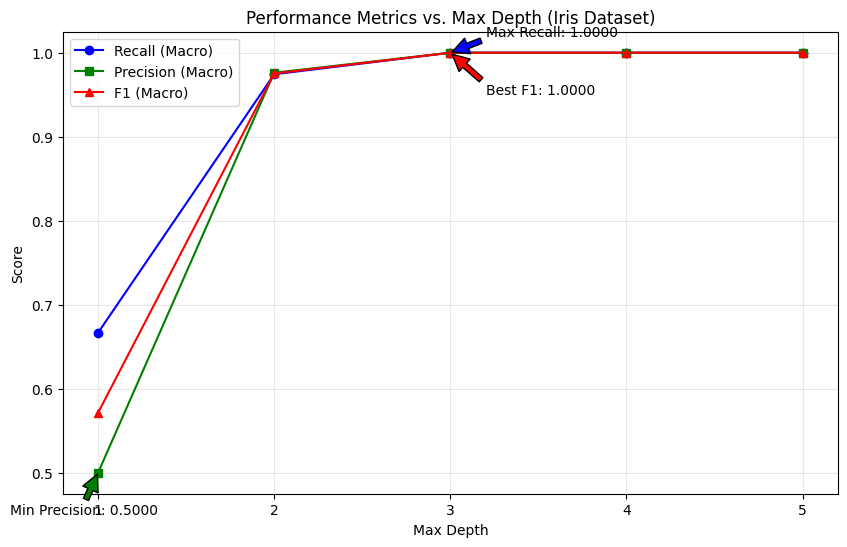

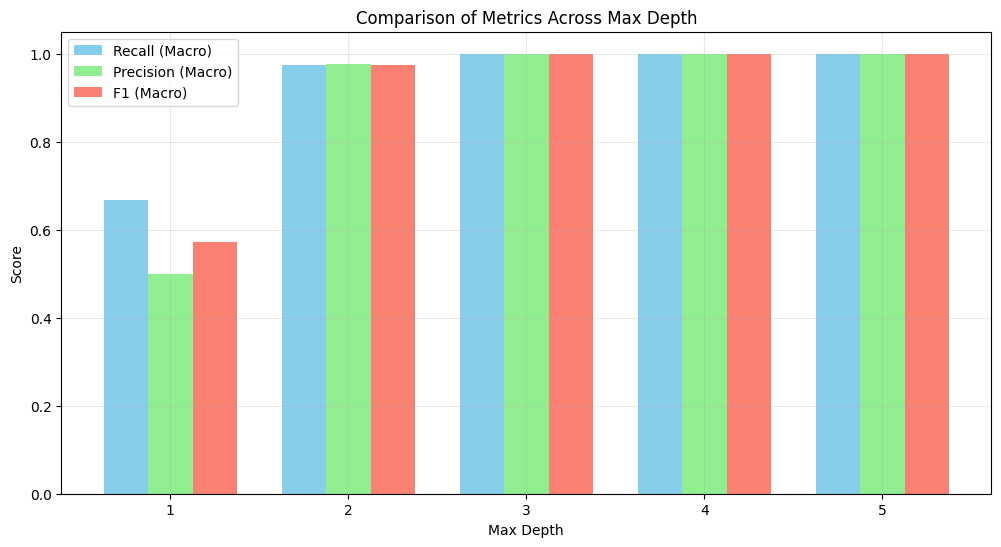

In [2]:
import matplotlib.pyplot as plt
# 可视化代码
# 1. 折线图：指标随 max_depth 变化
plt.figure(figsize=(10, 6))
depths = [r[0] for r in results]
plt.plot(depths, recalls, marker='o', label='Recall (Macro)', color='blue')
plt.plot(depths, precisions, marker='s', label='Precision (Macro)', color='green')
plt.plot(depths, f1s, marker='^', label='F1 (Macro)', color='red')

# 标注最高 Recall、最低 Precision、最佳 F1
max_recall_idx = np.argmax(recalls)
min_precision_idx = np.argmin(precisions)
max_f1_idx = np.argmax(f1s)

plt.annotate(f'Max Recall: {recalls[max_recall_idx]:.4f}', 
             xy=(depths[max_recall_idx], recalls[max_recall_idx]), 
             xytext=(depths[max_recall_idx] + 0.2, recalls[max_recall_idx] + 0.02),
             arrowprops=dict(facecolor='blue', shrink=0.05))
plt.annotate(f'Min Precision: {precisions[min_precision_idx]:.4f}', 
             xy=(depths[min_precision_idx], precisions[min_precision_idx]), 
             xytext=(depths[min_precision_idx] - 0.5, precisions[min_precision_idx] - 0.05),
             arrowprops=dict(facecolor='green', shrink=0.05))
plt.annotate(f'Best F1: {f1s[max_f1_idx]:.4f}', 
             xy=(depths[max_f1_idx], f1s[max_f1_idx]), 
             xytext=(depths[max_f1_idx] + 0.2, f1s[max_f1_idx] - 0.05),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.title('Performance Metrics vs. Max Depth (Iris Dataset)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(depths)
plt.savefig('P1_line.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. 柱状图：比较不同 max_depth 的指标
plt.figure(figsize=(12, 6))
x = np.arange(len(depths))
width = 0.25

plt.bar(x - width, recalls, width, label='Recall (Macro)', color='skyblue')
plt.bar(x, precisions, width, label='Precision (Macro)', color='lightgreen')
plt.bar(x + width, f1s, width, label='F1 (Macro)', color='salmon')

plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.title('Comparison of Metrics Across Max Depth')
plt.xticks(x, depths)
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('P1_bar.png', dpi=300, bbox_inches='tight')
plt.show()


In [3]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from numpy import log2

# 加载数据
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
columns = ['id', 'clump_thickness', 'uniformity_size', 'uniformity_shape', 'marginal_adhesion', 
           'single_epithelial_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
data = pd.read_csv(url, names=columns, na_values='?').dropna()
X = data.drop(columns=['id', 'class'])
y = data['class'].map({2: 0, 4: 1})#对于阴性和阳性重新赋值  

# 训练决策树
clf = DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, min_samples_split=5, random_state=42)
clf.fit(X, y)

# 手动计算 Entropy
def entropy(y):
    counts = np.bincount(y)
    probs = counts / len(y)
    sum = 0
    for i in range(len(probs)):
        if probs[i] > 0:
            sum += probs[i] * log2(probs[i])
    return -sum

# 手动计算 Gini
def gini(y):
    counts = np.bincount(y)
    probs = counts / len(y)
    sum = 0
    for i in range(len(probs)):
        if probs[i]>0:
            sum += probs[i]**2
    return 1 - sum

# 手动计算 Misclassification Error
def misclassification_error(y):
    counts = np.bincount(y)
    return 1 - max(counts) / len(y)

# 计算第一次分裂的指标
root_entropy = entropy(y)
root_gini = gini(y)
root_misclass = misclassification_error(y)

# 获取第一次分裂的特征和阈值
feature_idx = clf.tree_.feature[0]
threshold = clf.tree_.threshold[0]
left_mask = X.iloc[:, feature_idx] <= threshold
right_mask =X.iloc[:, feature_idx] >= threshold


#分别计算左右子树的熵
left_entropy = entropy(y[left_mask])
right_entropy = entropy(y[right_mask])
left_gini = gini(y[left_mask])
right_gini = gini(y[right_mask])
left_misclass = misclassification_error(y[left_mask])
right_misclass = misclassification_error(y[right_mask])

# 计算加权平均和信息增益
left_weight = sum(left_mask) / len(y)
right_weight = sum(right_mask) / len(y)
split_entropy = left_weight * left_entropy + right_weight * right_entropy
split_gini = left_weight * left_gini + right_weight * right_gini
split_misclass = left_weight * left_misclass + right_weight * right_misclass

info_gain = root_entropy - split_entropy

# 输出结果
print(f"根节点 Entropy: {root_entropy:.4f}, Gini: {root_gini:.4f}, Misclassification Error: {root_misclass:.4f}")
print(f"分裂后 Entropy: {split_entropy:.4f}, Gini: {split_gini:.4f}, Misclassification Error: {split_misclass:.4f}")
print(f"信息增益: {info_gain:.4f}")
print(f"第一次分裂特征: {X.columns[feature_idx]}, 阈值: {threshold:.4f}")


根节点 Entropy: 0.9340, Gini: 0.4550, Misclassification Error: 0.3499
分裂后 Entropy: 0.3451, Gini: 0.1294, Misclassification Error: 0.0732
信息增益: 0.5889
第一次分裂特征: uniformity_size, 阈值: 2.5000


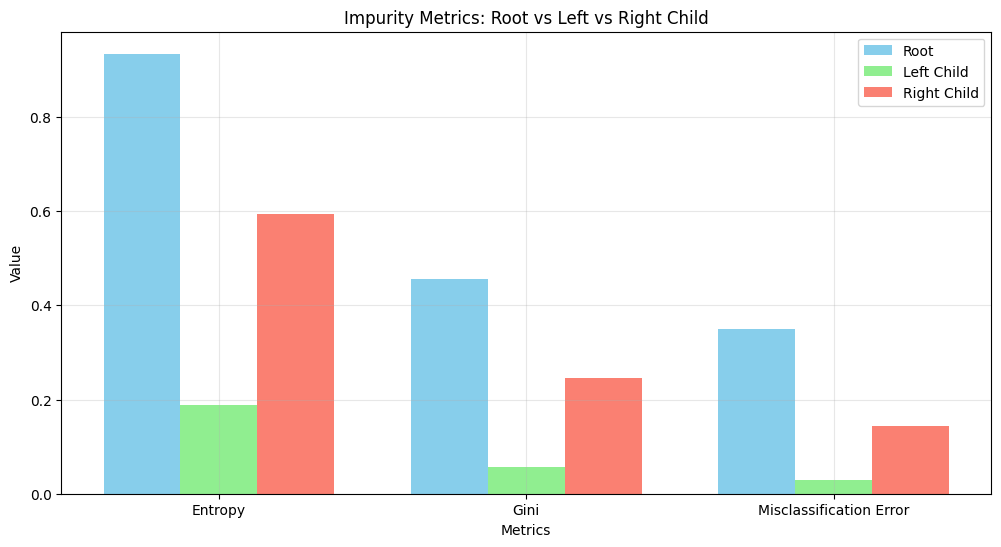

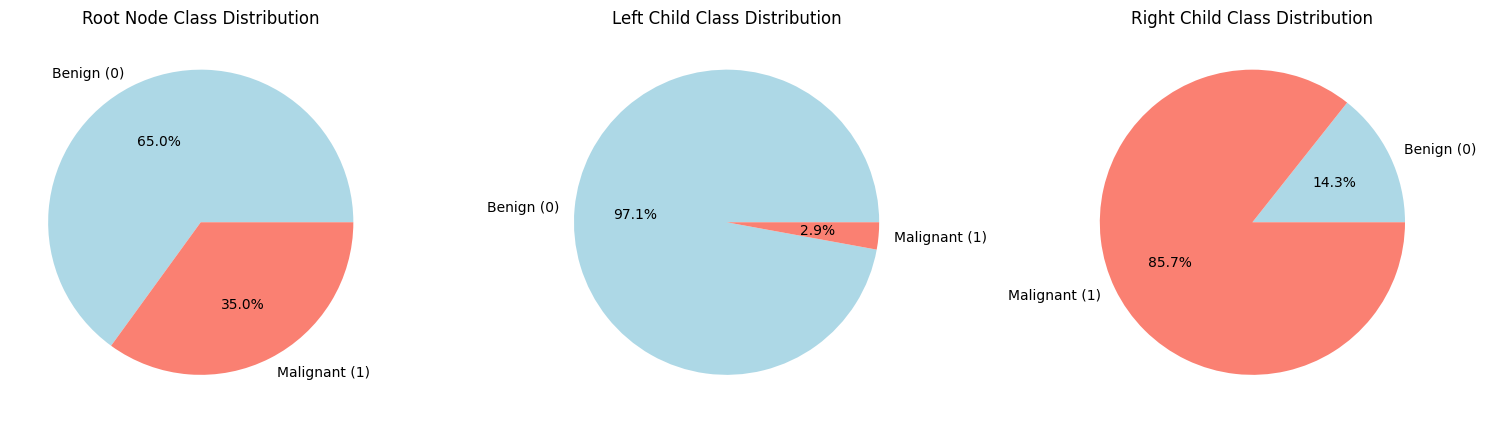

In [4]:
# 可视化代码
# 1. 柱状图：比较根节点和子节点的指标
metrics = ['Entropy', 'Gini', 'Misclassification Error']
root_values = [root_entropy, root_gini, root_misclass]
left_values = [left_entropy, left_gini, left_misclass]
right_values = [right_entropy, right_gini, right_misclass]

plt.figure(figsize=(12, 6))
x = np.arange(len(metrics))
width = 0.25

plt.bar(x - width, root_values, width, label='Root', color='skyblue')
plt.bar(x, left_values, width, label='Left Child', color='lightgreen')
plt.bar(x + width, right_values, width, label='Right Child', color='salmon')

plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Impurity Metrics: Root vs Left vs Right Child')
plt.xticks(x, metrics)
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('P2_bar.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. 饼图：显示类别分布
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 根节点
root_counts = np.bincount(y)
axes[0].pie(root_counts, labels=['Benign (0)', 'Malignant (1)'], autopct='%1.1f%%', colors=['lightblue', 'salmon'])
axes[0].set_title('Root Node Class Distribution')

# 左子节点
left_counts = np.bincount(y[left_mask])
axes[1].pie(left_counts, labels=['Benign (0)', 'Malignant (1)'], autopct='%1.1f%%', colors=['lightblue', 'salmon'])
axes[1].set_title('Left Child Class Distribution')

# 右子节点
right_counts = np.bincount(y[right_mask])
axes[2].pie(right_counts, labels=['Benign (0)', 'Malignant (1)'], autopct='%1.1f%%', colors=['lightblue', 'salmon'])
axes[2].set_title('Right Child Class Distribution')

plt.tight_layout()
plt.savefig('P2_pie.png', dpi=300, bbox_inches='tight')
plt.show()


In [5]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columns = ['id', 'diagnosis'] + [f'feature_{i}' for i in range(30)]
data = pd.read_csv(url, names=columns)
X = data.drop(columns=['id', 'diagnosis'])
y = data['diagnosis'].map({'B': 0, 'M': 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, min_samples_split=5, random_state=42)
clf.fit(X_train, y_train)
y_pred_orig = clf.predict(X_test)

def compute_confusion_matrix(y_true, y_pred):
    TP = sum((y_true == 1) & (y_pred == 1))
    FP = sum((y_true == 0) & (y_pred == 1))
    TN = sum((y_true == 0) & (y_pred == 0))
    FN = sum((y_true == 1) & (y_pred == 0))
    return TP, FP, TN, FN

def compute_metrics_from_cm(TP, FP, TN, FN):
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    FPR = FP / (FP + TN) if (FP + TN) > 0 else 0
    TPR = recall
    return precision, recall, f1, FPR, TPR

TP, FP, TN, FN = compute_confusion_matrix(y_test, y_pred_orig)
prec_orig, rec_orig, f1_orig, _, _ = compute_metrics_from_cm(TP, FP, TN, FN)

pca = PCA()
X_pca = pca.fit_transform(X)

X_train_pca1, X_test_pca1, y_train_pca1, y_test_pca1 = train_test_split(X_pca[:, :1], y, test_size=0.3, random_state=42)
clf.fit(X_train_pca1, y_train_pca1)
y_pred_pca1 = clf.predict(X_test_pca1)
TP_pca1, FP_pca1, TN_pca1, FN_pca1 = compute_confusion_matrix(y_test_pca1, y_pred_pca1)
prec_pca1, rec_pca1, f1_pca1, fpr_pca1, tpr_pca1 = compute_metrics_from_cm(TP_pca1, FP_pca1, TN_pca1, FN_pca1)

X_train_pca2, X_test_pca2, y_train_pca2, y_test_pca2 = train_test_split(X_pca[:, :2], y, test_size=0.3, random_state=42)
clf.fit(X_train_pca2, y_train_pca2)
y_pred_pca2 = clf.predict(X_test_pca2)
TP_pca2, FP_pca2, TN_pca2, FN_pca2 = compute_confusion_matrix(y_test_pca2, y_pred_pca2)
prec_pca2, rec_pca2, f1_pca2, fpr_pca2, tpr_pca2 = compute_metrics_from_cm(TP_pca2, FP_pca2, TN_pca2, FN_pca2)

print("原始数据: Precision={:.4f}, Recall={:.4f}, F1={:.4f}".format(prec_orig, rec_orig, f1_orig))
print("PCA (1个主成分): Precision={:.4f}, Recall={:.4f}, F1={:.4f}, FP={}, TP={}, FPR={:.4f}, TPR={:.4f}".format(
    prec_pca1, rec_pca1, f1_pca1, FP_pca1, TP_pca1, fpr_pca1, tpr_pca1))
print("PCA (2个主成分): Precision={:.4f}, Recall={:.4f}, F1={:.4f}, FP={}, TP={}, FPR={:.4f}, TPR={:.4f}".format(
    prec_pca2, rec_pca2, f1_pca2, FP_pca2, TP_pca2, fpr_pca2, tpr_pca2))

原始数据: Precision=0.9048, Recall=0.9048, F1=0.9048
PCA (1个主成分): Precision=0.9821, Recall=0.8730, F1=0.9244, FP=1, TP=55, FPR=0.0093, TPR=0.8730
PCA (2个主成分): Precision=0.9821, Recall=0.8730, F1=0.9244, FP=1, TP=55, FPR=0.0093, TPR=0.8730


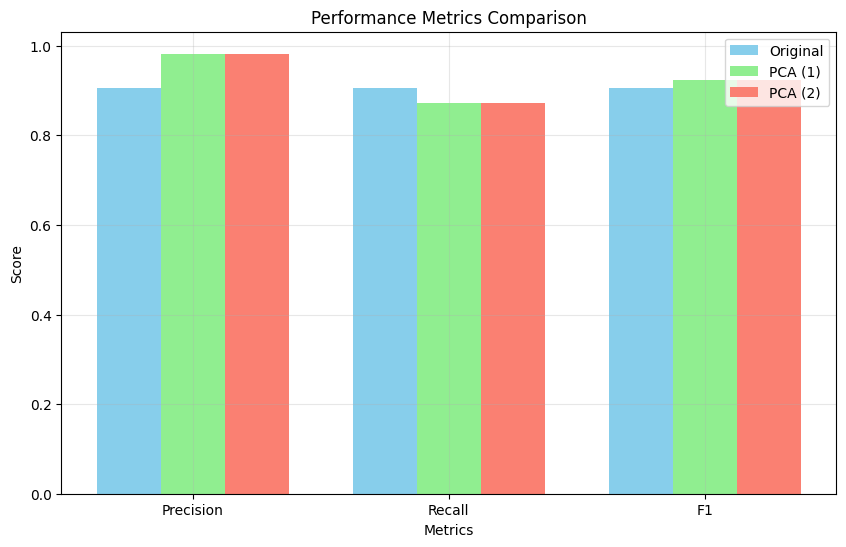

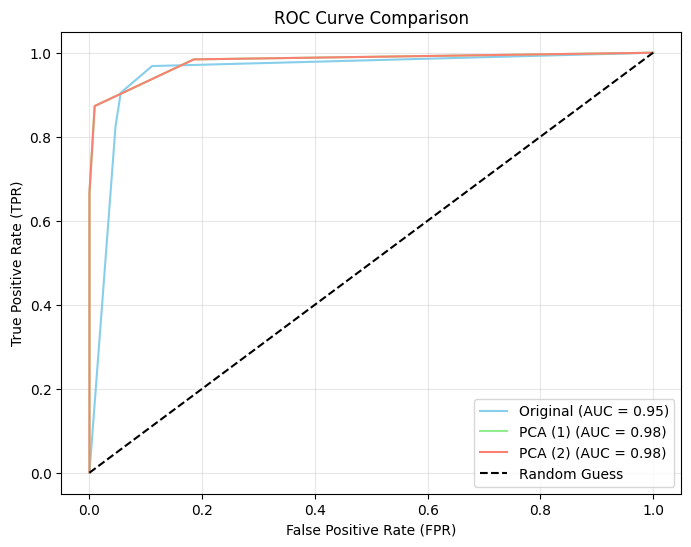

In [6]:
from sklearn.metrics import roc_curve, auc
# 1. 柱状图：比较 Precision、Recall 和 F1
metrics = ['Precision', 'Recall', 'F1']
orig_values = [prec_orig, rec_orig, f1_orig]
pca1_values = [prec_pca1, rec_pca1, f1_pca1]
pca2_values = [prec_pca2, rec_pca2, f1_pca2]

plt.figure(figsize=(10, 6))
x = np.arange(len(metrics))
width = 0.25

plt.bar(x - width, orig_values, width, label='Original', color='skyblue')
plt.bar(x, pca1_values, width, label='PCA (1)', color='lightgreen')
plt.bar(x + width, pca2_values, width, label='PCA (2)', color='salmon')

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Performance Metrics Comparison')
plt.xticks(x, metrics)
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('P3_bar.png', dpi=300, bbox_inches='tight')
plt.show()



# 2. ROC 曲线（需要预测概率）
clf.fit(X_train, y_train)
y_prob_orig = clf.predict_proba(X_test)[:, 1]
fpr_orig, tpr_orig, _ = roc_curve(y_test, y_prob_orig)
roc_auc_orig = auc(fpr_orig, tpr_orig)

clf.fit(X_train_pca1, y_train_pca1)
y_prob_pca1 = clf.predict_proba(X_test_pca1)[:, 1]
fpr_pca1, tpr_pca1, _ = roc_curve(y_test_pca1, y_prob_pca1)
roc_auc_pca1 = auc(fpr_pca1, tpr_pca1)

clf.fit(X_train_pca2, y_train_pca2)
y_prob_pca2 = clf.predict_proba(X_test_pca2)[:, 1]
fpr_pca2, tpr_pca2, _ = roc_curve(y_test_pca2, y_prob_pca2)
roc_auc_pca2 = auc(fpr_pca2, tpr_pca2)

plt.figure(figsize=(8, 6))
plt.plot(fpr_orig, tpr_orig, label=f'Original (AUC = {roc_auc_orig:.2f})', color='skyblue')
plt.plot(fpr_pca1, tpr_pca1, label=f'PCA (1) (AUC = {roc_auc_pca1:.2f})', color='lightgreen')
plt.plot(fpr_pca2, tpr_pca2, label=f'PCA (2) (AUC = {roc_auc_pca2:.2f})', color='salmon')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('P3_line', dpi=300, bbox_inches='tight')
plt.show()


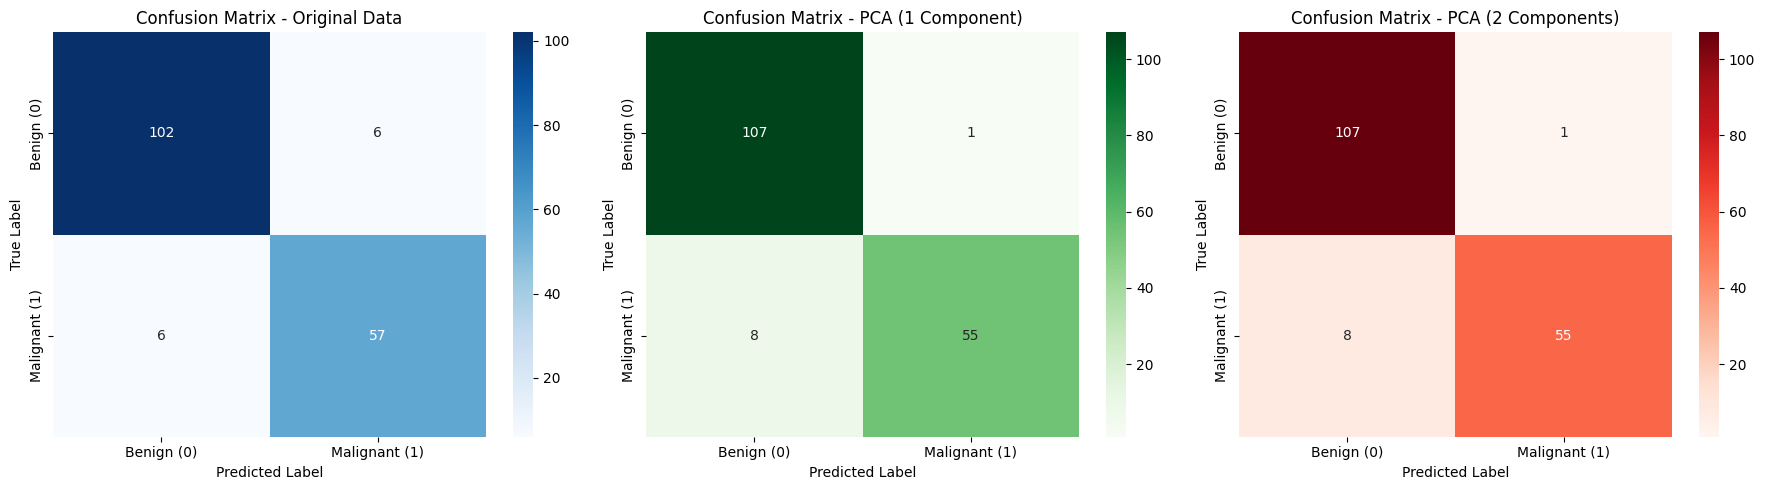

In [7]:
import seaborn as sns
# 可视化混淆矩阵
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 原始数据混淆矩阵
cm_orig = np.array([[TN, FP], [FN, TP]])
sns.heatmap(cm_orig, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Benign (0)', 'Malignant (1)'], yticklabels=['Benign (0)', 'Malignant (1)'])
axes[0].set_title('Confusion Matrix - Original Data')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# PCA (1) 混淆矩阵
cm_pca1 = np.array([[TN_pca1, FP_pca1], [FN_pca1, TP_pca1]])
sns.heatmap(cm_pca1, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['Benign (0)', 'Malignant (1)'], yticklabels=['Benign (0)', 'Malignant (1)'])
axes[1].set_title('Confusion Matrix - PCA (1 Component)')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

# PCA (2) 混淆矩阵
cm_pca2 = np.array([[TN_pca2, FP_pca2], [FN_pca2, TP_pca2]])
sns.heatmap(cm_pca2, annot=True, fmt='d', cmap='Reds', ax=axes[2],
            xticklabels=['Benign (0)', 'Malignant (1)'], yticklabels=['Benign (0)', 'Malignant (1)'])
axes[2].set_title('Confusion Matrix - PCA (2 Components)')
axes[2].set_xlabel('Predicted Label')
axes[2].set_ylabel('True Label')

plt.tight_layout()
plt.savefig('P3_matrix', dpi=300, bbox_inches='tight')
plt.show()
